# 데이터 불러오기

In [1]:
import pandas as pd
fac = pd.read_csv('tbl_factory.csv', index_col=0)
w = pd.read_csv('tbl_warehouse.csv', index_col=0)
cost = pd.read_csv('rel_cost.csv', index_col=0)
trans = pd.read_csv('tbl_transaction.csv', index_col=0)

print(fac.shape, w.shape, cost.shape, trans.shape)
display(fac.head(), w.head(), cost.head(), trans.head())

(8, 3) (6, 3) (24, 3) (4000, 4)


,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부


,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부


,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [2]:
# trans에 cost조인
join_data = pd.merge(trans, cost, left_on = ['ToFC', 'FromWH'], right_on = ['FCID', 'WHID'], how='left')

#그 다음은 공장정보 조인
join_data = pd.merge(join_data, fac, on='FCID', how='left')

# 그 다음은 창고 정보 조인
join_data = pd.merge(join_data, w, on = 'WHID', how='left')

#이제 직관적인 컬럼순서 변경

join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', 'WHSupply', 'WHRegion']]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [3]:
north = join_data.loc[join_data['WHRegion'] == '북부']
south = join_data.loc[join_data['WHRegion'] == '남부']
print(len(north), len(south))

2000 2000


# 현재 운송량과 비용을 확인

In [4]:
# 지사 간 비용 확인
print("북부지사 총비용:" + str(north['Cost'].sum()) +"만원")
print("남부지사 총비용:" + str(south['Cost'].sum()) + "만원")

#지사 간 운송량 확인
print("북부지사 총부품 운송개수:" + str(north['Quantity'].sum()) + "개")
print('남부지사 총부품 운송개수:' + str(south['Quantity'].sum()) + "개")

#남부지사가 효율적으로 운송

북부지사 총비용:2189.3만원
남부지사 총비용:2062.0만원
북부지사 총부품 운송개수:49146개
남부지사 총부품 운송개수:50214개


In [5]:
#부품 1개당 운송비용 비용:만원
tmp = (north['Cost'].sum()/ north['Quantity'].sum()) *10000
tmp2 = (south['Cost'].sum()/ south['Quantity'].sum()) *10000
print('북부지사 부품 1개당 운송비용:' +str(int(tmp)) + '원') #소수점으로 나오는 것 방지를 위해 int로 바꿔줌
print('북부지사 부품 1개당 운송비용:' +str(int(tmp2)) + '원')

북부지사 부품 1개당 운송비용:445원
북부지사 부품 1개당 운송비용:410원


In [6]:
#지사 간 평균 운송비용 확인
cost_chk = pd.merge(cost, fac, on = 'FCID', how='left')
cost_chk.head()

,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,FC00001,WH00001,0.4,서울공장,28,북부
1,FC00001,WH00002,0.8,서울공장,28,북부
2,FC00001,WH00003,1.5,서울공장,28,북부
3,FC00002,WH00001,0.9,수원공장,29,북부
4,FC00002,WH00002,0.8,수원공장,29,북부


In [7]:
#북부/남부 별로 평균 비용값 확인
print('북부 평균 비용:', cost_chk.loc[(cost_chk['FCRegion'] == '북부')]['Cost'].mean())
print('남부 평균비용:', cost_chk.loc[(cost_chk['FCRegion'] == '남부')]['Cost'].mean())

북부 평균 비용: 1.075
남부 평균비용: 1.05


# 네트워크 가시화

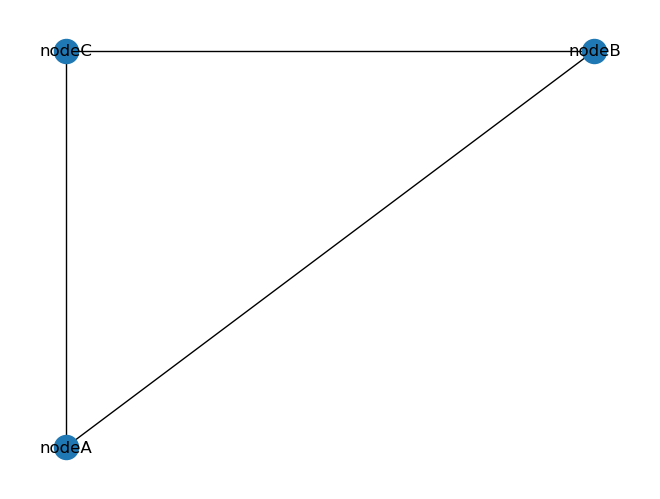

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

#그래프 객체 설정
G = nx.Graph()

#노드 설정
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

#엣지 설정
G.add_edge('nodeA', 'nodeB')
G.add_edge('nodeA', 'nodeC')
G.add_edge('nodeB', 'nodeC')

#좌표 설정
pos = {}
pos['nodeA'] = (0,0)
pos['nodeB'] = (1,1)
pos['nodeC'] = (0,1)

#그리기
nx.draw(G, pos, with_labels=True)
plt.show()

# 네트워크에 노드 추가

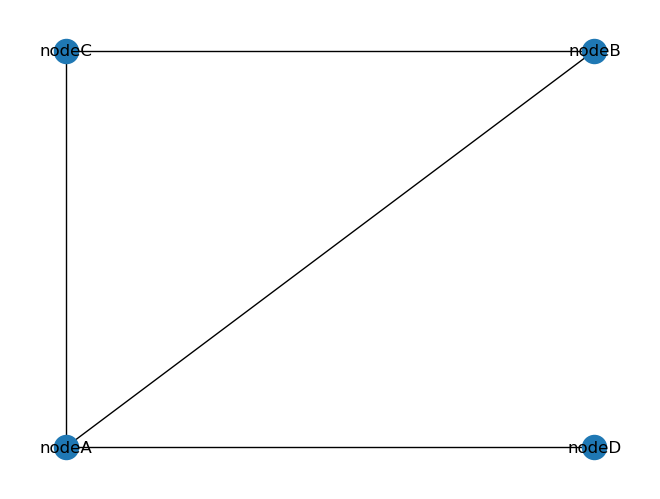

In [9]:
#앞서 만든 그림에 새로운 노드 nodeD(nodeA와 연결되는)를 추가

#노드
G.add_node('nodeD')
#엣지
G.add_edge('nodeA', 'nodeD')
#좌표설정
pos['nodeD'] = (1,0)

#그리기
nx.draw(G, pos, with_labels=True)

# 경로에 가중치 부여

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#데이터 불러오기
df_w = pd.read_csv('network_weight.csv') #가중치
df_p = pd.read_csv('network_pos.csv') #좌표

display(df_w, df_p)

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [11]:
size = 10
edge_w = []

for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_w.append(df_w.iloc[i][j]*size)
edge_w


[6.39921,
 1.4335300000000002,
 9.44669,
 5.21848,
 0.0,
 2.64556,
 0.0,
 4.5615,
 5.68434,
 0.0,
 6.17635,
 6.12096,
 6.16934,
 9.43748,
 0.0,
 0.0,
 0.0,
 6.97631,
 0.60225,
 6.66767,
 6.706379999999999,
 2.10383,
 0.0,
 3.15428,
 0.0]

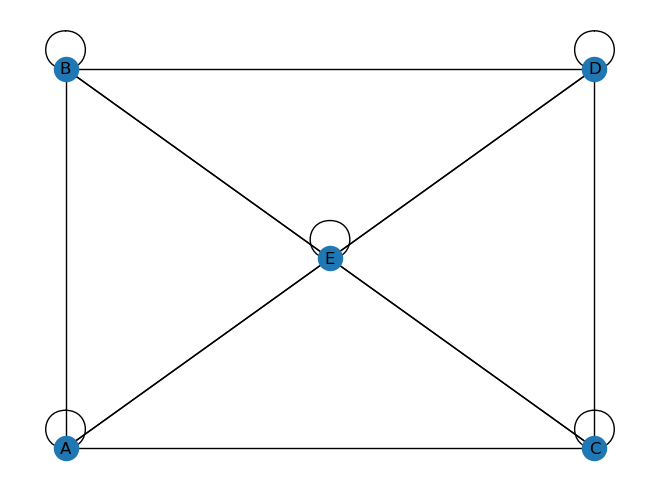

In [12]:
#r객체
G = nx.Graph()

#노드 5개 설정
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
#엣지 설정
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

#좌표 설정
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1]) #pos[노드] = 좌표 임을 이용

#그리기
nx.draw(G, pos, with_labels=True)
plt.show()

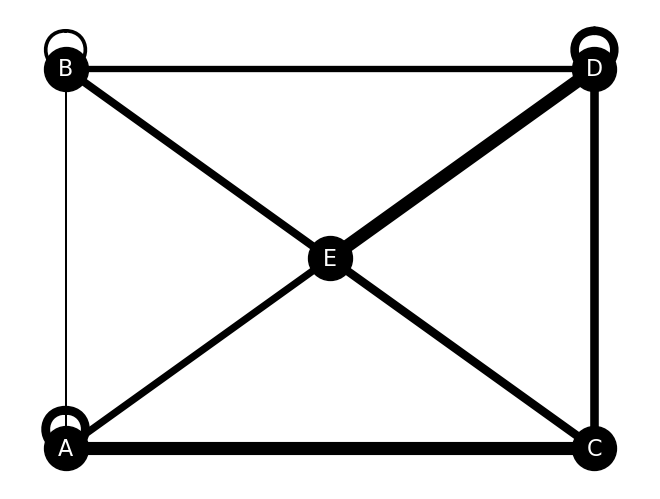

In [13]:
#엣지에 가중치 추가, 꾸미ㅣ
nx.draw(G,pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color = 'w', width = edge_w) #가중치는 width옵션지정
plt.show()

# 운송경로데이터를 불러오고 시각화

In [14]:
df_tr = pd.read_csv('trans_route.csv', index_col = '공장')
df_pos = pd.read_csv('trans_route_pos.csv')
display(df_tr, df_pos)

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


7


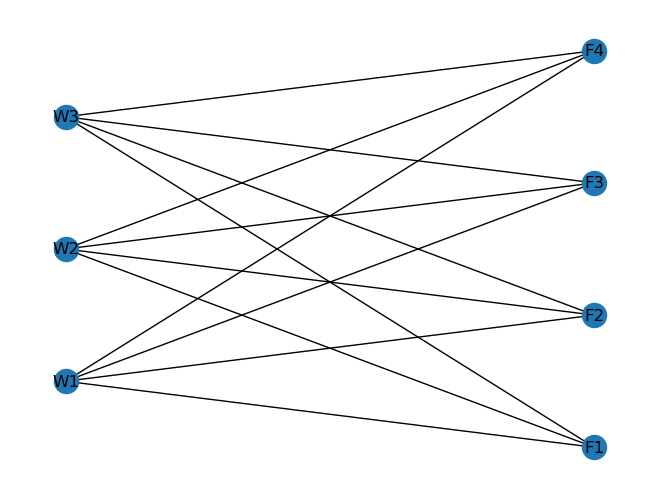

In [15]:
#객체
G = nx.Graph()
print(len(df_pos.columns))
#노드 설정(W 3개, F 4개)
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])
    
#엣지 설정(W에서 하나 F에서 하나 연결)
for i in range(0,3):
    for j in range(3, len(df_pos.columns)):
        G.add_edge(df_pos.columns[i], df_pos.columns[j])
#좌표설정
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])
#그리기
nx.draw(G, pos, with_labels=True)
plt.show()

In [16]:
sy = []
size = 0.1 #가중치 값이 너무 커서 줄임(그대로 쓰면 엣지가 엄청 굵게 나옴)
for i in range(len(df_tr.index)):
    for j in range(len(df_tr.columns)):
        sy.append(df_tr.iloc[i,j] *size)
sy

[1.5, 1.5, 0.0, 0.5, 0.5, 0.0, 3.0, 0.5, 1.0, 1.5, 0.2, 1.5]

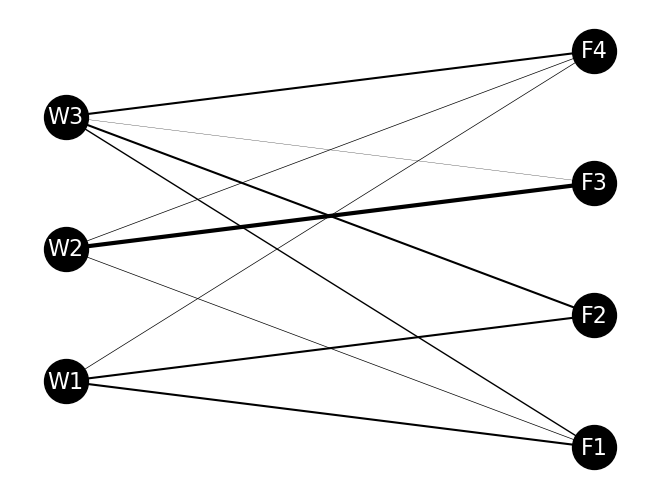

In [17]:
#그래프 다시 그리기
nx.draw(G,pos, with_labels=True,font_size = 16, node_size = 1000, node_color = 'k', font_color='w', width = sy)#width에 가중치 리스트 설정
plt.show()

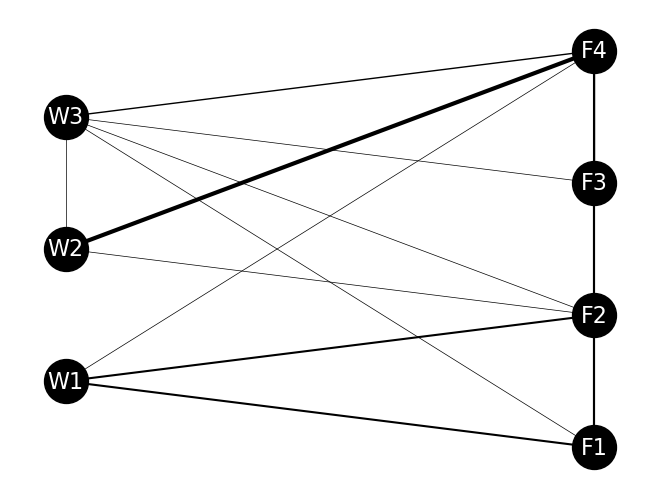

Index(['W1', 'W2', 'W3'], dtype='object', name='공장')
Index(['F1', 'F2', 'F3', 'F4'], dtype='object')
Index(['W1', 'W2', 'W3', 'F1', 'F2', 'F3', 'F4'], dtype='object')


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# 데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_pos = pd.read_csv('trans_route_pos.csv')

# 객체 생성
G = nx.Graph()

# 노드 설정
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

# 엣지 설정 및 가중치 리스트화
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            # 엣지 추가
            G.add_edge(df_pos.columns[i],df_pos.columns[j])
            # 엣지 가중치 추가
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
            if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                    weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
            elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                    weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
            edge_weights.append(weight)
# 좌표 설정
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])

# 그리기
nx.draw(G, pos, with_labels = True,font_size=16, node_size = 1000, node_color ='k', font_color='w', width=edge_weights)

#표시
plt.show()
                    
print(df_tr.index)
print(df_tr.columns)
print(df_pos.columns)

# 운송 비용 함수(목적함수)를 작성하자

In [29]:
#운송 비용을 계산하는 함수 만들기
import pandas as pd

#데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col = '공장') #창고 - 공장 간 운송 경로
df_tc = pd.read_csv('trans_cost.csv', index_col = '공장') #창고 - 공장 간 운송하는 데 드는 비용

display(df_tr, df_tc)

print(df_tr.iloc[0][2])

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


0


In [26]:
#총 운송비용 = 각 경로별 운송량*운송비용의 합
#운송 비용 함수
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)): #i : W(창고)
        for j in range(len(df_tr.columns)): #j : F(공장)
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j] #운송 비용: i -> j로 갈 때 몇 번 갔는지 * 드는 비용 모두 더하기
    return cost
# 이 예제에서 총 운송비용은 얼마나오는지 함수 적용
trans_cost(df_tr, df_tc)

1493

# 제약 조건 만들기

In [30]:
#제약조건
# 창고(W):최대 공급 가능한 부품 수가 제한되어있음 -> supply.csv데이터에 나온 것까지만 공급 가능 더 많이 못만듦
# 공장(F):채워야 할 최소한의 제품제조량이 있음 -> demand.csv데이터에 나온 최소한의 수요량이 필요함 더 적으면 안됨

import pandas as pd

#필요한 데이터
df_tr = pd.read_csv('trans_route.csv', index_col = '공장')
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

display(df_tr, df_demand, df_supply)

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


,F1,F2,F3,F4
0,28,29,31,25


,W1,W2,W3
0,35,41,42


In [41]:
#수요측 제약조건
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    
    #그렇다면 temp_sum(실제 수요) >= demand(최소 수요)여야 수요량을 만족하고 있다는 것
    if temp_sum >= df_demand.iloc[0][i]:
        print('수요량 만족')
    else: print('수요량 만족X 운송경로 재계산')
        
    #정보 출력
    print('공장' + str(df_demand.columns[i]) + '운송량:' + str(temp_sum) + "(수요량 :" + str(df_demand.iloc[0][i]) + ")")
    print("  ")
#sum(df_tr[0])은 안되므로  sum(df_tr[df_demand.columns[i]])이렇게 표현 df_tr의 열별로 다 더하기


수요량 만족
공장F1운송량:30(수요량 :28)
  
수요량 만족
공장F2운송량:30(수요량 :29)
  
수요량 만족
공장F3운송량:32(수요량 :31)
  
수요량 만족
공장F4운송량:25(수요량 :25)
  


In [40]:
#공급측 제약조건
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    
    #그렇다면  temp_sum(실제 공급) <= supply(최대 공급) 이어야 실제로 최대로 공급할 수 있는 양보다 더 적거나 같을 것
    if temp_sum <= df_supply.iloc[0][i]:
        print('공급한계 범위내')
    else:print('공급한계 초과 운동경로 재계산 필요')
        
    #정보 출력
    print('창고' + str(df_supply.columns[i]) + '운송량:' + str(temp_sum) + " (공급량 :" + str(df_supply.iloc[0][i]) + ")")
    print("  ")
print(df_tr.loc[df_supply.columns[0]])
#df.loc[0] 전체 데이터 프레임에서 인덱스 이름이 0인 행만 추출해줘 df.loc[행 인덱싱, 열 인덱싱] df.loc[0, 'Name'] 0이라는 인덱스의 Name 컬럼만
#df.iloc[0] 전체 데이터 프레임에서 0번째 있는 값만 추출


공급한계 범위내
창고W1운송량:35 (공급량 :35)
  
공급한계 범위내
창고W2운송량:40 (공급량 :41)
  
공급한계 범위내
창고W3운송량:42 (공급량 :42)
  
F1    15
F2    15
F3     0
F4     5
Name: W1, dtype: int64


# 운송 경로 변경 후 목적함수의 변화 확인

In [42]:
import pandas as pd
import numpy as np

#데이터 불러오기
df_tr_new = pd.read_csv('trans_route_new.csv', index_col = '공장')
df_tr_new

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [43]:
#운송 비용 계산
print('기존:', trans_cost(df_tr, df_tc), '변경:', trans_cost(df_tr_new, df_tc))

기존: 1493 변경: 1428


In [48]:
#제약조건 함수화 -> 앞서 만든 if문에서, 수요(or공급)을 만족하면 1, 아니면 0을 출력하도록 하는 flag만들기
## 먼저 0으로 초기화시키고, 만족하는 경우엔 1을 넣어주기

## 공장(F)의 수요
def c_demand(df_tr, df_demand):
    
    #초기화
    flag = np.zeros(len(df_demand.columns))
    
    #계산
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if temp_sum >= df_demand.iloc[0][i]:
            flag[i] = 1
    return flag

## 창고(W)의 공급
def c_supply(df_tr, df_supply):
    
    #초기화
    flag = np.zeros(len(df_supply.columns))
    
    #계산
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i] = 1
            
    return flag
#수요 계산 결과
c_demand(df_tr_new, df_demand)

#공급 계산 결과
c_supply(df_tr_new, df_supply)

array([1., 0., 1.])

In [50]:
print(df_tr.loc[df_supply.columns[0]])

F1    15
F2    15
F3     0
F4     5
Name: W1, dtype: int64
